# EMPLOYEE ATTRITION - IBM HR MACHINE LEARNING

In [ ]:
#pip install pandas_profiling

In [1]:
import pandas_profiling
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.subplots as sbl

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report, confusion_matrix, 
precision_score, roc_auc_score, recall_score, roc_curve, precision_recall_curve)


## 

In [ ]:
df = pd.read_csv('HR-Attrition-upsampled-cleaned.csv')
df.head()

In [ ]:
# pandas_profiling.ProfileReport(df)

In [ ]:
df.describe()

In [ ]:
# JobLevel is highly correlated with monthly income and others have constant value. Dropping these columns

"""df = df.drop(['Over18', 'StandardHours', 'EmployeeCount', 'JobLevel'], axis=1)
df.columns
"""
# Department vs Job Role
# Daily rate, Hourly rate, Monthly rate, monthly income: monthly income

In [ ]:
leaving_ones = df[df['Attrition'] == 'Yes']
print(leaving_ones.shape[0])

left_after_promo = leaving_ones[leaving_ones['YearsSinceLastPromotion'] == 0]
print("Employees left after taking promo: ")
print(left_after_promo.shape[0])

In [ ]:
leaving_ones.groupby(['YearsAtCompany'])['YearsAtCompany'].agg('count')
temp = leaving_ones[leaving_ones['YearsAtCompany'] == 10]
temp
temp.groupby(['RelationshipSatisfaction'])['RelationshipSatisfaction'].agg('count')

In [ ]:
leaving_ones_less_dist = leaving_ones[leaving_ones['DistanceFromHome'] < 5]
temp = leaving_ones_less_dist[leaving_ones_less_dist['YearsSinceLastPromotion'] == 0]

In [ ]:
df['Attrition'].value_counts()

In [ ]:
df['PerformanceRating'].value_counts()

In [ ]:
df['Department'].value_counts()

In [ ]:
df.groupby('Department')['JobRole'].count()

In [ ]:
df['JobRole'].value_counts()

Feature Engineering

In [ ]:
import featuretools as ft

# Create new entityset
es = ft.EntitySet(id = 'EmployeeNumber')


In [ ]:
es = es.entity_from_dataframe(entity_id = 'df', dataframe = df, 
                              index = 'EmployeeNumber', 
                              variable_types = {'Education': ft.variable_types.Categorical,
                                                'EnvironmentSatisfaction': ft.variable_types.Categorical,
                                                'JobInvolvement': ft.variable_types.Categorical,
                                                'JobSatisfaction': ft.variable_types.Categorical,
                                                'PerformanceRating': ft.variable_types.Categorical,
                                                'StockOptionLevel': ft.variable_types.Categorical,
                                                'TrainingTimesLastYear': ft.variable_types.Categorical,
                                                'WorkLifeBalance': ft.variable_types.Categorical})
es['df']

In [ ]:
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100
primitives[primitives['type'] == 'aggregation'].head(10)

In [ ]:
primitives[primitives['type'] == 'transform'].head(10)

In [ ]:
from sklearn.utils import resample

df_majority = df[df.Attrition != 'Yes']
df_minority = df[df.Attrition== 'Yes']
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1233,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Attrition.value_counts()
print(df_upsampled.shape)
df_upsampled.head()

In [ ]:
df_upsampled.to_csv('HR-Attrition-upsampled.csv', index=False)

## --- SEC 1

In [49]:
employee_cleaned = pd.read_csv('HR-Attrition-upsampled-cleaned.csv')

In [3]:
# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager'
            ]

"""
# creating a list of only numerical values
numerical = [
    u'Age',
    #u'DailyRate', u'DistanceFromHome',     u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
    #u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
    u'MonthlyIncome',
    #u'MonthlyRate', u'NumCompaniesWorked',    u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
    u'StockOptionLevel',
    #u'TotalWorkingYears',    u'TrainingTimesLastYear', u'WorkLifeBalance',
    u'YearsAtCompany'
    #u'YearsInCurrentRole', u'YearsSinceLastPromotion', u'YearsWithCurrManager'
]"""

"\n# creating a list of only numerical values\nnumerical = [\n    u'Age',\n    #u'DailyRate', u'DistanceFromHome',     u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',\n    #u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',\n    u'MonthlyIncome',\n    #u'MonthlyRate', u'NumCompaniesWorked',    u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',\n    u'StockOptionLevel',\n    #u'TotalWorkingYears',    u'TrainingTimesLastYear', u'WorkLifeBalance',\n    u'YearsAtCompany'\n    #u'YearsInCurrentRole', u'YearsSinceLastPromotion', u'YearsWithCurrManager'\n]"

In [ ]:
employee_cleaned = pd.read_csv('HR-Attrition-upsampled-cleaned.csv')
employee_cleaned = 

In [52]:
# Empty list to store columns with categorical data
categorical = []
for col, value in employee_cleaned.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

        
# Store the numerical columns in a list numerical
numerical = employee_cleaned.columns.difference(categorical)

In [53]:
dfcols = employee_cleaned.columns
for i in dfcols:
    print(i)

Age
Attrition
BusinessTravel
Department
DistanceFromHome
Education
EducationField
EnvironmentSatisfaction
Gender
JobInvolvement
JobSatisfaction
MaritalStatus
MonthlyIncome
NumCompaniesWorked
OverTime
PercentSalaryHike
RelationshipSatisfaction
StockOptionLevel
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany


In [54]:
attrition_cat = employee_cleaned[categorical]
#attrition_cat = attrition_cat.drop(['Attrition'], axis=1)

In [92]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(10)

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_'Human Resources',Department_'Research & Development',Department_Sales,EducationField_'Human Resources',EducationField_'Life Sciences',...,EducationField_Marketing,EducationField_Medical,EducationField_Other,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
2,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0
4,1,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
5,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,0,1,0
6,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0
7,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
8,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
9,1,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1


In [57]:
attrition_num = employee_cleaned[numerical]

# Concat the two dataframes together columnwise
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
print("Shape of final dataset attrition_final: " + str(attrition_final.shape))
print(attrition_final.columns)

Shape of final dataset attrition_final: (2466, 35)
Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'Attrition_No', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_'Human Resources'',
       'Department_'Research & Development'', 'Department_Sales',
       'EducationField_'Human Resources'', 'EducationField_'Life Sciences'',
       'EducationField_'Technical Degree'', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other', 'Gender_Female',
       'Gender_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes'],
      dtype='object')


In [58]:
dfcols = attrition_final.columns
for i in dfcols:
    print(i)

Age
DistanceFromHome
Education
EnvironmentSatisfaction
JobInvolvement
JobSatisfaction
MonthlyIncome
NumCompaniesWorked
PercentSalaryHike
RelationshipSatisfaction
StockOptionLevel
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
Attrition_No
Attrition_Yes
BusinessTravel_Non-Travel
BusinessTravel_Travel_Frequently
BusinessTravel_Travel_Rarely
Department_'Human Resources'
Department_'Research & Development'
Department_Sales
EducationField_'Human Resources'
EducationField_'Life Sciences'
EducationField_'Technical Degree'
EducationField_Marketing
EducationField_Medical
EducationField_Other
Gender_Female
Gender_Male
MaritalStatus_Divorced
MaritalStatus_Married
MaritalStatus_Single
OverTime_No
OverTime_Yes


In [59]:
attrition_final.to_csv(r'attrition_dummy1.csv')

In [8]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = employee_cleaned["Attrition"].apply(lambda x: target_map[x])
target.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size= 0.80,
                                                         random_state=0);

In [10]:
import plotly.figure_factory as ff

def model_performance_plot(model) : 
    #conf matrix
    conf_matrix = confusion_matrix(target_val, y_pred)
#     trace1 = go.Heatmap(z=conf_matrix  ,x = ["No (pred)","Yes (pred)"],
#                         y = ["No (Actual)","Yes (Actual)"], xgap=2, ygap=2,
#                         colorscale = 'Viridis', 
#                         showscale=False, text=conf_matrix)
#     trace1 = ff.create_annotated_heatmap(conf_matrix, annotation_text=conf_matrix, 
#                                          colorscale=colorscale, hoverinfo='z')
#     for i in range(len(trace1.layout.annotations)):
#         trace1.layout.annotations[i].font.size = 9

    #show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #plot roc curve
    model_roc_auc = round(roc_auc_score(target_val, y_score) , 3)
    fpr, tpr, t = roc_curve(target_val, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : ",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(target_val, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    #subplots
    fig = sbl.make_subplots(rows=3, cols=1, print_grid=False, 
                        subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve'))
    
#     fig.append_trace(trace1.data[0],1,1)
#     fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,1)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,3,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance</b><br>'+str(model),
                        autosize = False, height = 900,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
#     fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis3"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [11]:
def plot_feature_importance(model):
    tmp = pd.DataFrame({'Feature': list(attrition_final), 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(30)
    plt.figure(figsize = (10,12))
    plt.title('Top 30 - Features importance - {0}'.format(model),fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

In [12]:
def plot_confusion_matrix(model):
    conf_matrix = confusion_matrix(target_val, y_pred)
    trace1 = go.Heatmap(z=conf_matrix  ,x = ["No (pred)","Yes (pred)"],
                        y = ["No (Actual)","Yes (Actual)"], xgap=2, ygap=2,
                        colorscale = 'Viridis', 
                        showscale=False, text=conf_matrix)
    trace1 = ff.create_annotated_heatmap(conf_matrix, x = ["No (pred)","Yes (pred)"],
                        y = ["No (Actual)","Yes (Actual)"], xgap=2, ygap=2,
                        colorscale = 'Viridis', 
                        showscale=False, annotation_text=conf_matrix, 
                                         hoverinfo='z')
    trace1['layout'].update(showlegend = False, title = '<b>Model Confusion matrix</b><br>'+str(model).split('(')[0],
                        autosize = True, height = 900,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    # for i in range(len(trace1.layout.annotations)):
    #     trace1.layout.annotations[i].font.size = 9

    trace1.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier

seed = 345
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

rf = RandomForestClassifier(**rf_params)
rf.fit(train, target_train)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [14]:
rf_predictions = rf.predict(test)
print("Predictions finished")

Predictions finished


In [15]:
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.7672064777327935
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       250
           1       0.78      0.73      0.76       244

    accuracy                           0.77       494
   macro avg       0.77      0.77      0.77       494
weighted avg       0.77      0.77      0.77       494



In [16]:
y_pred = rf.predict(test)
y_score = rf.predict_proba(test)[:,1]

model_performance_plot('rf')


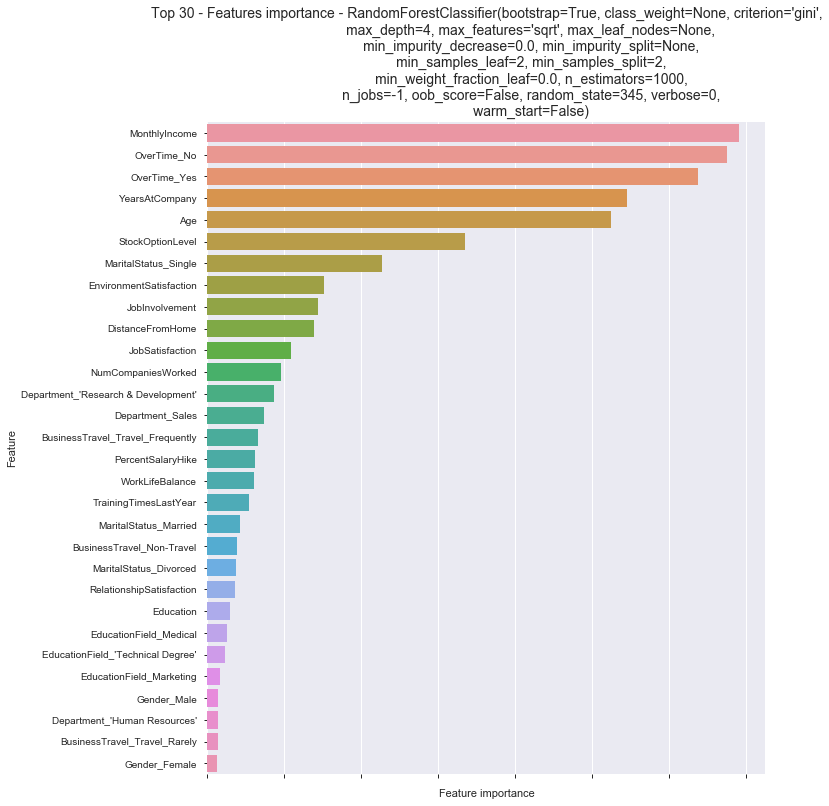

In [17]:
plot_feature_importance(rf)
plot_confusion_matrix(rf)

In [18]:
from sklearn.tree import export_graphviz

export_graphviz(rf.estimators_[0], out_file="rf_tree.png", max_depth=4,
                feature_names=train.columns, impurity=False, filled=True)

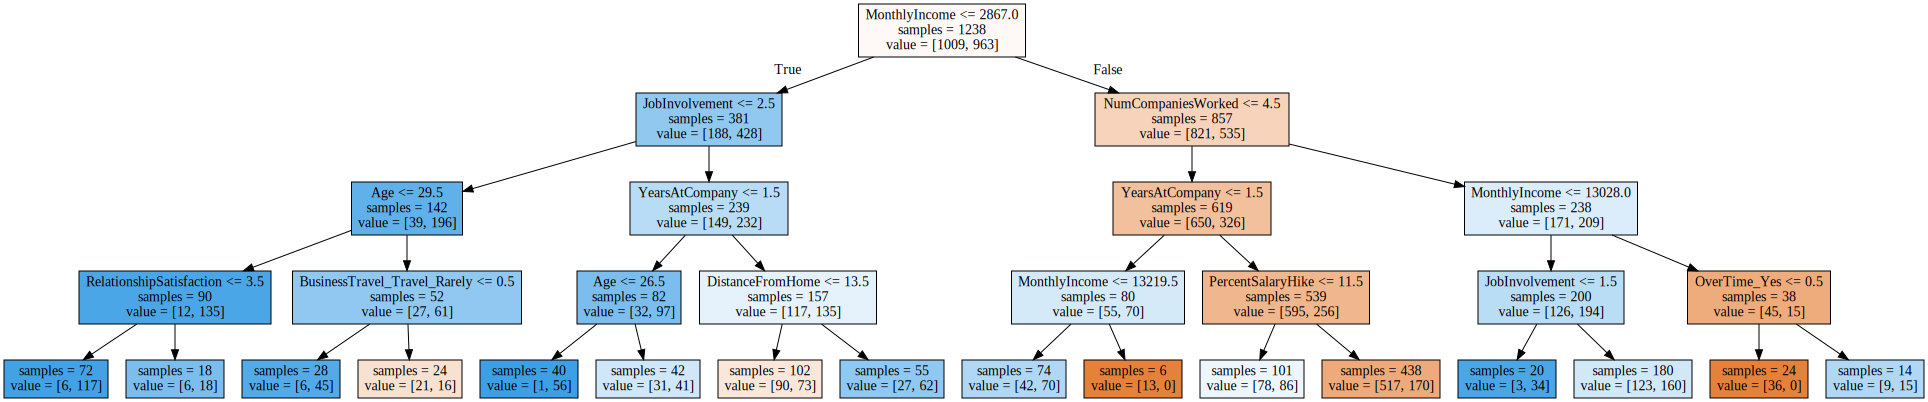

In [19]:
import graphviz
with open("rf_tree.png") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [20]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(train, target_train)
# Get our predictions
gb_predictions = gb.predict(test)
print("Predictions have finished")

Predictions have finished


In [21]:
print(accuracy_score(target_val, gb_predictions))
print(classification_report(target_val, gb_predictions))

0.97165991902834
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       250
           1       0.95      1.00      0.97       244

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



In [22]:
y_pred = gb.predict(test)
y_score = gb.predict_proba(test)[:,1]

model_performance_plot('gb')

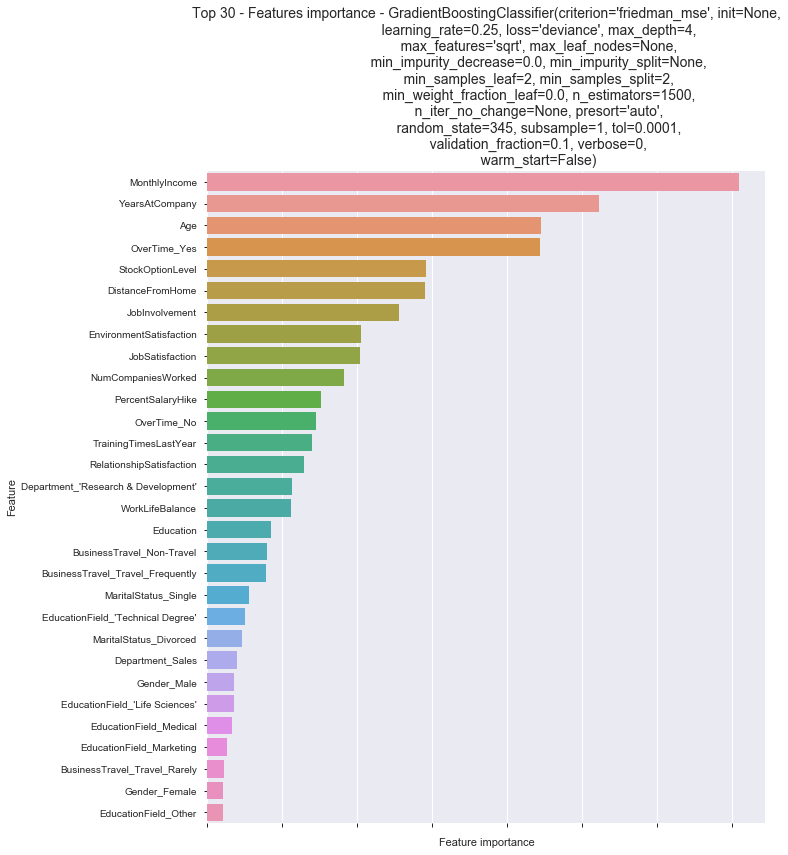

In [23]:
plot_feature_importance(gb)
plot_confusion_matrix(gb)

In [24]:
# export_graphviz(gb, out_file="gb_tree.dot", max_depth=4,feature_names=train.columns, impurity=False, filled=True)

In [25]:
# with open("gb_tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

In [26]:
from sklearn import svm
# import sklearn.cross_validation

svm_clf = svm.SVC(probability=True)
svm_clf.fit(train, target_train)

# gamma='scale' decreases the accuracy by a lot

C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
svm_predictions = svm_clf.predict(test)
print("Predictions finished")

Predictions finished


In [28]:
print(accuracy_score(target_val, svm_predictions))
print(classification_report(target_val, svm_predictions))

0.9959514170040485
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       250
           1       1.00      0.99      1.00       244

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494



In [29]:
y_pred = svm_clf.predict(test)
y_score = svm_clf.predict_proba(test)[:,1]

model_performance_plot('svm_clf')

In [31]:
#plot_feature_importance(svm_clf)
# plot_confusion_matrix(svm_clf)

In [ ]:
# export_graphviz(svm_clf.estimators_[0], out_file="svm_tree.dot", max_depth=4,feature_names=train.columns, impurity=False, filled=True)

# with open("svm_tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

In [33]:
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [34]:
no_classifiers = len(dict_classifiers.keys())


def batch_classify(train, target_train, verbose=True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers, 3)), columns=[
                              'classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.perf_counter()
        classifier.fit(train, target_train)
        t_end = time.perf_counter()
        t_diff = t_end - t_start
        train_score = classifier.score(test, target_val)
        df_results.loc[count, 'classifier'] = key
        df_results.loc[count, 'train_score'] = train_score
        df_results.loc[count, 'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count += 1
    return df_results

In [35]:
df_results = batch_classify(train, target_train)
print(df_results.sort_values(by='train_score', ascending=False))

C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



trained Logistic Regression in 0.02 s
trained Nearest Neighbors in 0.00 s
trained Linear SVM in 0.29 s
trained Gradient Boosting Classifier in 0.24 s
trained Decision Tree in 0.01 s
trained Random Forest in 0.04 s
trained Neural Net in 0.22 s
trained Naive Bayes in 0.00 s
                     classifier  train_score  training_time
2                    Linear SVM     0.995951       0.285877
5                 Random Forest     0.963563       0.036848
4                 Decision Tree     0.927126       0.009404
3  Gradient Boosting Classifier     0.878543       0.235019
1             Nearest Neighbors     0.769231       0.002954
0           Logistic Regression     0.736842       0.018762
7                   Naive Bayes     0.696356       0.001936
6                    Neural Net     0.572874       0.224350


In [78]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, attrition_final, target, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, attrition_final, target, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, attrition_final, target, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier(criterion='entropy',
                                       max_depth=4
                                       #splitter  = 'best'
                                       )

tree_scores = cross_val_score(tree_clf, attrition_final, target, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, attrition_final, target, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, attrition_final, target, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, attrition_final, target, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, attrition_final, target, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'],
     'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)
result_df

C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gam

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,1.000000
1,SVC,0.982157
2,KNN,0.744526
3,Dec Tree,1.000000
4,Grad B CLF,1.000000
5,Rand FC,1.000000
6,Neural Classifier,0.708435
7,Naives Bayes,0.708435


In [80]:
tree_clf.fit(train, target_train)

dec_tree_predictions = tree_clf.predict(test)
print("Predictions finished")

Predictions finished


In [81]:
print(accuracy_score(target_val, dec_tree_predictions))
print(classification_report(target_val, dec_tree_predictions))

0.7327935222672065
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       250
           1       0.78      0.64      0.70       244

    accuracy                           0.73       494
   macro avg       0.74      0.73      0.73       494
weighted avg       0.74      0.73      0.73       494



In [82]:
y_pred = tree_clf.predict(test)
y_score = tree_clf.predict_proba(test)[:, 1]

model_performance_plot('tree_clf')

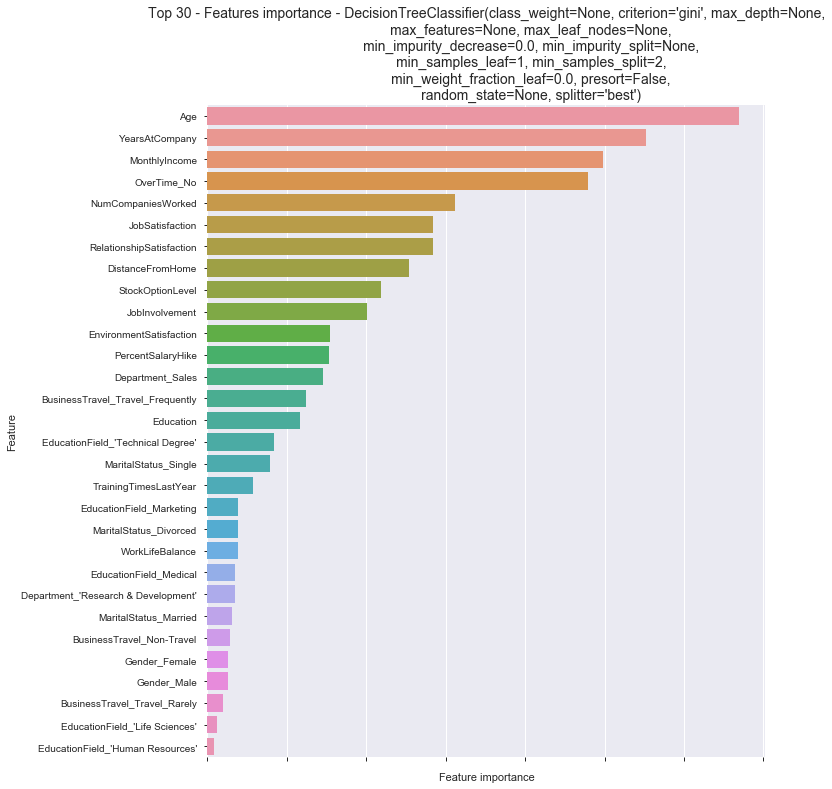

In [40]:
plot_confusion_matrix(tree_clf)

plot_feature_importance(tree_clf)

In [70]:
from sklearn.externals.six import StringIO  
import pydotplus  
from IPython.display       import Image  

In [88]:
"""export_graphviz(tree_clf, out_file="dtc_tree.dot",
                max_depth=4,
                feature_names=train.columns, impurity=True, filled=True)

with open("dtc_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
"""



# VISUALIZE NEW DECISION TREE
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,
                #max_depth=4,
                filled=True, 
                #rounded=True,
                #special_characters=True,
                feature_names=train.columns,
                class_names=['0', '1']
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Attrition3.png')
Image(graph.create_png())

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

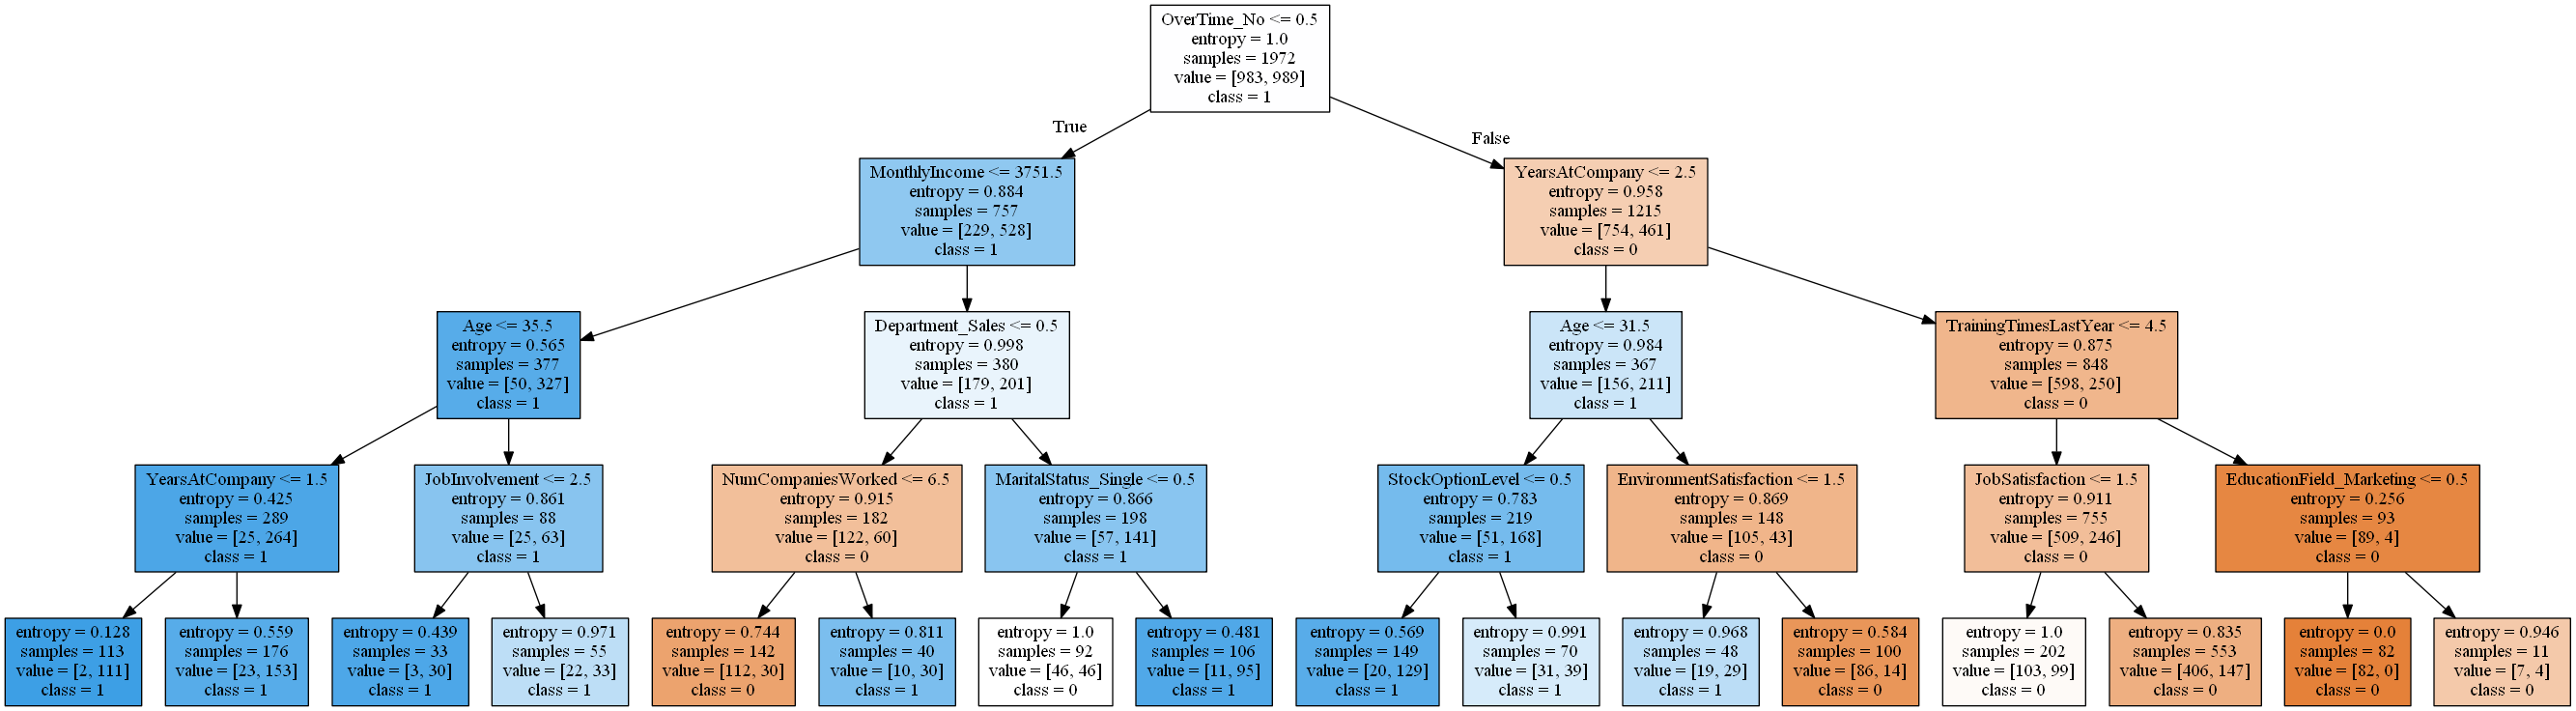

In [91]:

# Decision Tree
tree_clf = tree.DecisionTreeClassifier(criterion='entropy',
                                       max_depth=4
                                       #splitter  = 'best'
                                       )

tree_clf.fit(train, target_train)

dec_tree_predictions = tree_clf.predict(test)
#print("Predictions finished")

y_pred = tree_clf.predict(test)
y_score = tree_clf.predict_proba(test)[:, 1]

#model_performance_plot('tree_clf')

# VISUALIZE NEW DECISION TREE
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,
                #max_depth=4,
                filled=True, 
                #rounded=True,
                #special_characters=True,
                feature_names=train.columns,
                class_names=['0', '1']
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('Attrition3.png')
Image(graph.create_png())
